In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('fraud_data.csv', sep = ',')

In [22]:
data.shape

(14446, 15)

In [23]:
data.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [24]:
data.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
city                      object
state                     object
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                  object
dtype: object

In [5]:
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [6]:
data.tail()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0
14445,22-01-2019 00:55,Daugherty-Thompson,food_dining,50.09,Unionville,MO,40.4815,-92.9951,3805,"""Investment banker, corporate""",15-09-1950,65e7370f473f9b9d75796c8033a7c929,40.387243,-92.224871,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [8]:
data.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [9]:
data.describe(include = 'object')

,trans_date_trans_time,merchant,category,city,state,job,dob,trans_num,is_fraud
count,14446,14446,14446,14446,14446,14446,14446,14446,14446
unique,12126,693,14,176,13,163,187,14383,4
top,26-12-2020 23:29,Kilback LLC,grocery_pos,Phoenix,CA,"""Surveyor, minerals""",17-07-1989,a3806e984cec6ac0096d8184c64ad3a1,0
freq,5,58,1602,297,3375,262,197,2,12600


In [45]:
missing_val = pd.DataFrame({'Missing_Count': df.isnull().sum(),
                            'Missing_Percentage': df.isnull().mean() * 100})

missing_val

,Missing_Count,Missing_Percentage
trans_date_trans_time,0,0.0
merchant,0,0.0
category,0,0.0
amt,0,0.0
city,0,0.0
state,0,0.0
lat,0,0.0
long,0,0.0
city_pop,0,0.0
job,0,0.0


In [11]:
data.duplicated().sum()

63

In [32]:
duplicate_data = data.loc[data.duplicated(),]
duplicate_data

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
8725,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
8857,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
8964,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
8972,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
8982,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13261,18-01-2019 14:38,Shanahan-Lehne,personal_care,21.54,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,ce3b2734ce646ef6a47b3484a8e043e5,38.211376,-109.986757,1
13372,18-01-2019 22:06,Beier LLC,entertainment,528.98,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,3417f366e2e1d5dd25a3a89a3aae9f3d,39.164469,-109.933543,1
13376,18-01-2019 22:12,Bartoletti and Sons,personal_care,21.23,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,2df9fa2d0e508ed2a83aa3ac6f4b5d5a,38.998205,-110.005615,1
13392,18-01-2019 23:16,Ankunding-Carroll,travel,9.33,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",23-04-1987,a0ed41246d201717db7250fa2375c73b,39.230640,-108.990363,1


In [41]:
df = data[data.duplicated(keep = False)]
df[df['merchant'] == 'Predovic Inc']

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
8857,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1


In [17]:
data['amt'].sort_values(ascending = False)

5148     3261.47
8140     3178.51
3763     3154.76
10451    2612.14
7432     2416.72
          ...   
9622        1.01
2283        1.01
7625        1.01
12572       1.01
4769        1.00
Name: amt, Length: 14446, dtype: float64

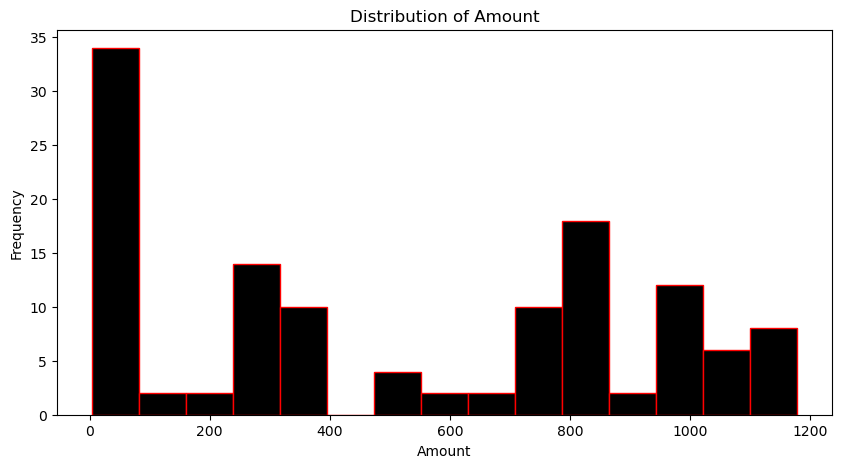

In [51]:
plt.figure(figsize = (10, 5))
plt.hist(df['amt'], bins = 15, color = 'black', edgecolor = 'red')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')
plt.show()

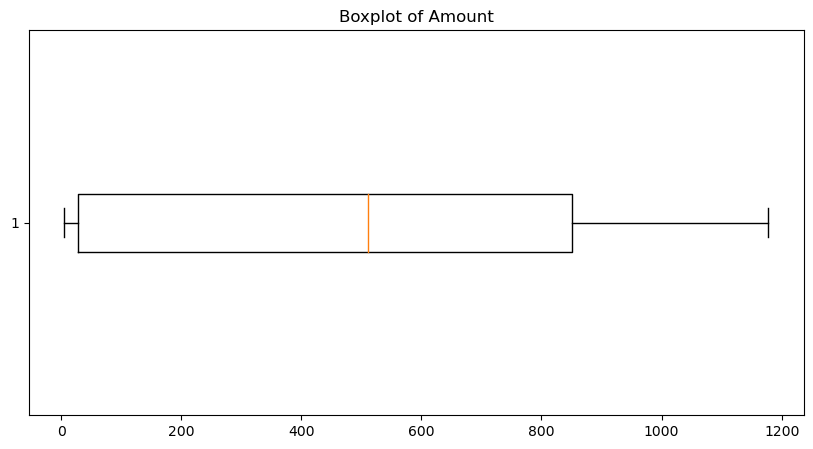

In [59]:
plt.figure(figsize = (10, 5))
plt.boxplot(df['amt'], vert = False)
plt.title('Boxplot of Amount')
plt.show()

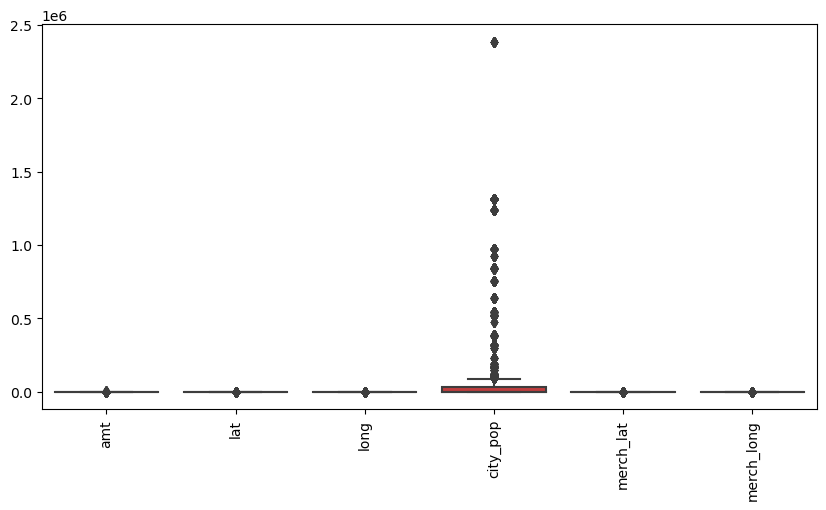

In [60]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = data.select_dtypes(include = np.number))
plt.xticks(rotation = 90)
plt.show()

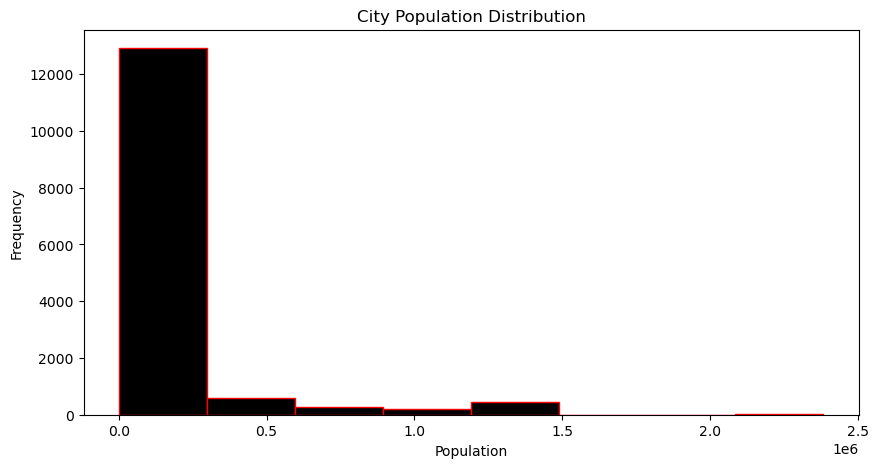

In [66]:
plt.figure(figsize = (10, 5))
plt.hist(data['city_pop'], bins = 8, color = 'black', edgecolor = 'red')
plt.title('City Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

In [67]:
Q1 = data['amt'].quantile(0.25)
Q3 = data['amt'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [68]:
data['amt_outlier'] = ((data['amt'] < lower) | (df['amt'] > upper))
data['amt_outlier'].value_counts()

False    14358
True        88
Name: amt_outlier, dtype: int64

In [69]:
data['amt'] = data['amt'].clip(lower, upper)

In [70]:
data

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,amt_outlier
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.370,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,False
1,04-01-2019 15:06,Predovic Inc,shopping_net,234.455,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,True
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.610,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,False
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,234.455,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,True
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.170,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.000,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0,False
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.070,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0,False
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.840,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0,False
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,234.455,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0,False


In [71]:
corr_matrix = data.select_dtypes(include = np.number).corr()
corr_matrix

,amt,lat,long,city_pop,merch_lat,merch_long
amt,1.000000,0.031725,-0.014829,0.022418,0.031465,-0.015184
lat,0.031725,1.000000,-0.178313,-0.219438,0.994169,-0.178322
long,-0.014829,-0.178313,1.000000,-0.068590,-0.177608,0.999008
city_pop,0.022418,-0.219438,-0.068590,1.000000,-0.218902,-0.068690
merch_lat,0.031465,0.994169,-0.177608,-0.218902,1.000000,-0.177507
merch_long,-0.015184,-0.178322,0.999008,-0.068690,-0.177507,1.000000


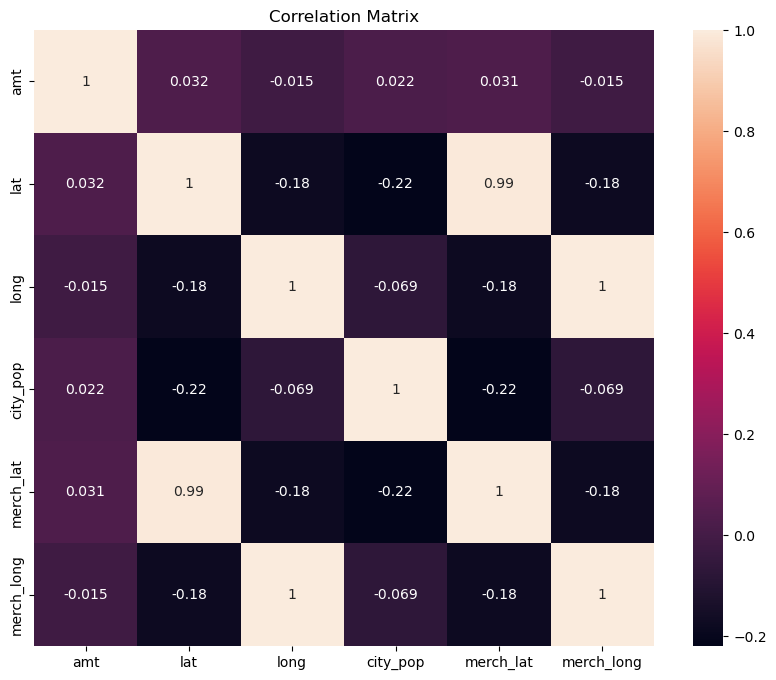

In [74]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix')
plt.show()

In [77]:
df.to_csv('clean_dataset.csv', index = False)